<a href="https://colab.research.google.com/github/Avinier/Coal-Classifier/blob/main/Coal_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing neccassary libs
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import imghdr
import cv2

# **Loading the Data**


In [ ]:
#Checking and removing dodgy images (with extenstion svg etc. or files which aren't images)

data_dir = '/content/drive/MyDrive/Coal-Classifier/data'
image_exts = ['jpeg','jpg', 'bmp', 'png']

#os.listdir returns all contents in the filepath
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
#Loading the data in the pipeline
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 357 files belonging to 2 classes.


In [ ]:
#Having the data as a numpy array, with the images (array form) and labels, because it ain't preloaded in the memory
#allows us to loop through the pipeline
data_iterator = data.as_numpy_iterator()

In [ ]:
#Gives the next batch in the data_iterator
batch = data_iterator.next()

# **Pre-Processing the Data**

In [ ]:
#Scales the images from 0-255 to 0-1 for optimization
scaled = batch[0] / 255
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
scaled_iterator.next()[0].max()


1.0

In [ ]:
#Divides the data into parts for testing, validation
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)

train = data.take(train_size)
validate = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Deep Learning Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
logdir = '/content/drive/MyDrive/Coal-Classifier/logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=validate, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 28s 3s/step - loss: 0.0097 - accuracy: 0.9961 - val_loss: 0.0476 - val_accuracy: 0.9896
Epoch 2/20
8/8 [==============================] - 29s 3s/step - loss: 0.0251 - accuracy: 0.9961 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 3/20
8/8 [==============================] - 28s 3s/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0513 - val_accuracy: 0.9896
Epoch 4/20
8/8 [==============================] - 29s 3s/step - loss: 0.0365 - accuracy: 0.9922 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 5/20
8/8 [==============================] - 40s 5s/step - loss: 0.0306 - accuracy: 0.9883 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 6/20
8/8 [==============================] - 29s 3s/step - loss: 0.0142 - accuracy: 0.9922 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 7/20
8/8 [==============================] - 29s 3s/step - loss: 0.0050 - accuracy: 0.9961 - val_loss: 0.0211 - val_accuracy: 0.9896
Epoch 8/20
8/8 [==================

# **Evaluation of Perfomance**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy

precision = Precision()
recall = Recall()
accu = Accuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, Y = batch
  y_hat = model.predict(X)
  precision.update_state(Y, y_hat)
  recall.update_state(Y, y_hat)
  accu.update_state(Y, y_hat)

In [ ]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {accu.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy: 0.0


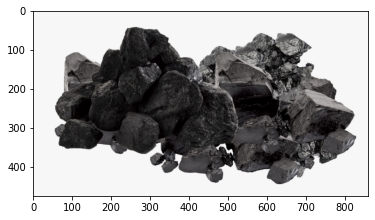

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Coal-Classifier/coal_test.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

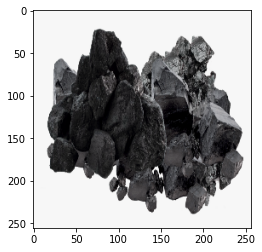

In [ ]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
y_hat = model.predict(np.expand_dims(resize/255, 0))
y_hat

array([[0.01589644]], dtype=float32)

# **Save the Model**


In [ ]:
from tensorflow.keras.models import load_model

model.save(os.path.join('/content/drive/MyDrive/Coal-Classifier/models', 'coal_classifier.h5'))

In [ ]:
new_model = load_model('/content/drive/MyDrive/Coal-Classifier/models/coal_classifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01589644]], dtype=float32)